# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [8]:
! pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [9]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

In [10]:
# best linear model
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1) #this model uses all variables to predict bill depth
y = penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X,y)


lr = LinearRegression()
enc = OneHotEncoder()

# using column transformer to dummify variables
ct = ColumnTransformer(
    [('dummify', OneHotEncoder(), ['species', 'island', 'sex']),
     ]
)

# a pipeline that the data will go through, first column transformer, then linear regression
my_pipeline = Pipeline(
    [('preprocessing', ct),
     ('ols', lr)]

)


fitted_pipeline1 = my_pipeline.fit(X_train, y_train)
predict1 = fitted_pipeline1.predict(X_test)

X_test['predict'] = predict1
X_test1 = X_test

MSE1 = mean_squared_error(y_test, predict1) #MSE between predicted values of the model and y_test data

print(MSE1)

predict11 = fitted_pipeline1.predict(X_train)

X_train['predict'] = predict11
X_train1 = X_train

MSE11 = mean_squared_error(y_train, predict11)  #MSE between predicted values and y_train data to see fitting

print(MSE11)


0.7807952008928574
0.656113359688755


In [31]:
# kNN model with k = 1
ct = ColumnTransformer(
    [('dummify', OneHotEncoder(), ['species', 'island', 'sex']),
     ]
)

# a pipeline that the data will go through, first column transformer, then linear regression
my_pipeline = Pipeline(
    [('preprocessing', ct),
     ('kNN', KNeighborsRegressor(n_neighbors=10))]

)


fitted_pipeline2 = my_pipeline.fit(X_train, y_train)
predict2 = fitted_pipeline2.predict(X_test)

X_test['predict'] = predict2
X_test2 = X_test

MSE2 = mean_squared_error(y_test, predict2) #MSE between predicted values of the model and y_test data

print(MSE2)

predict21 = fitted_pipeline2.predict(X_train)

X_train['predict'] = predict21
X_train1 = X_train

MSE21 = mean_squared_error(y_train, predict21)  #MSE between predicted values and y_train data to see fitting

print(MSE21)


0.9075595238095241
0.6463140562248992


In [20]:
# kNN model with k = 100
ct = ColumnTransformer(
    [('dummify', OneHotEncoder(), ['species', 'island', 'sex']),
     ]
)

# a pipeline that the data will go through, first column transformer, then linear regression
my_pipeline = Pipeline(
    [('preprocessing', ct),
     ('kNN', KNeighborsRegressor(n_neighbors=100))]

)


fitted_pipeline3 = my_pipeline.fit(X_train, y_train)
predict3 = fitted_pipeline3.predict(X_test)

X_test['predict'] = predict3
X_test3 = X_test

MSE3 = mean_squared_error(y_test, predict3) #MSE between predicted values of the model and y_test data

print(MSE3)

predict31 = fitted_pipeline3.predict(X_train)

X_train['predict'] = predict31
X_train3 = X_train

MSE31 = mean_squared_error(y_train, predict31)  #MSE between predicted values and y_train data to see fitting

print(MSE31)

1.6742865714285724
1.2765839196787159


In [33]:
# decision tree model
ct = ColumnTransformer(
    [('dummify', OneHotEncoder(), ['species', 'island', 'sex']),
     ]
)

# a pipeline that the data will go through, first column transformer, then linear regression
my_pipeline = Pipeline(
    [('preprocessing', ct),
     ('decision', DecisionTreeRegressor())]

)


fitted_pipeline4 = my_pipeline.fit(X_train, y_train)
predict4 = fitted_pipeline4.predict(X_test)

X_test['predict'] = predict4
X_test4 = X_test

MSE4 = mean_squared_error(y_test, predict4) #MSE between predicted values of the model and y_test data

print(MSE4)

predict41 = fitted_pipeline4.predict(X_train)

X_train['predict'] = predict41
X_train4 = X_train

MSE41 = mean_squared_error(y_train, predict41)  #MSE between predicted values and y_train data to see fitting

print(MSE41)

0.8705791119989602
0.6178986937479142


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [35]:
data = { 'MSE': [MSE4, MSE3, MSE2, MSE1], 'Model': ['Decision Tree', 'k = 100', 'k = 10', 'Linear Model'], 'MSE2': [MSE41,MSE31,MSE21,MSE11]}
df = pd.DataFrame(data)

print(df)

        MSE          Model      MSE2
0  0.870579  Decision Tree  0.617899
1  0.870579        k = 100  1.276584
2  0.907560         k = 10  0.646314
3  0.780795   Linear Model  0.646314


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sur

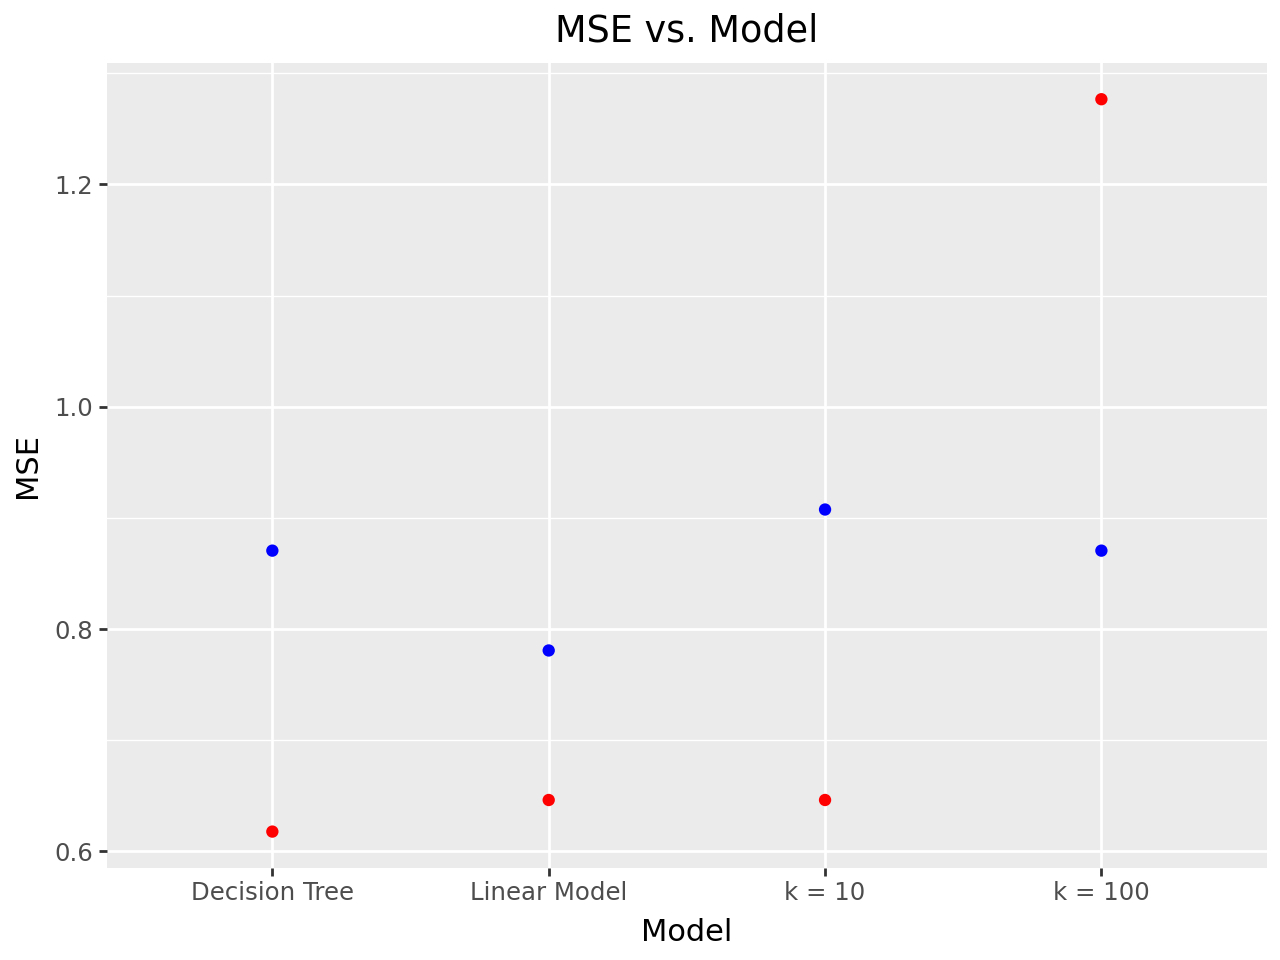

In [41]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, guides, guide_legend, geom_line

(ggplot(df)
    + geom_point(aes(y='MSE', x='Model'), color = 'blue')
    + geom_smooth(aes(y='MSE', x='Model'), color = 'blue')
    + geom_point(aes(y='MSE2', x='Model'), color = 'red')
    + geom_smooth(aes(y='MSE2', x='Model'), color = 'red')
    + labs(title="MSE vs. Model", x="Model", y="MSE")
    + guides(color=guide_legend(title="MSE Type (Red = test, blue = training)"))
)